# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

>**Tip**: Though it's not a mandate, students can attempt the classroom quizzes to ensure statistical numeric values are calculated correctly in many cases.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [118]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [207]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [208]:
len(df)

294478

**294478** rows

**c.** The number of unique users in the dataset.

In [209]:
df.user_id.nunique()

290584

**290584** unique users

**d.** The proportion of users converted.

In [210]:
len(df.query('converted == 1')) / len(df)

0.11965919355605512

almost **12%**

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [215]:
df.query('group == "treatment" & landing_page != "new_page"').shape[0]

1965

The number of times when the "group" is treatment but "landing_page" is not a new_page = **1965**

**f.** Do any of the rows have missing values?

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97087 entries, 0 to 97086
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       97087 non-null  int64  
 1   timestamp     97087 non-null  object 
 2   group         97086 non-null  object 
 3   landing_page  97086 non-null  object 
 4   converted     97086 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.7+ MB


there are **no rows** with missing rows

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [216]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.drop(df[((df.group == 'control') & (df.landing_page == 'new_page')) | 
                 ((df.group == 'treatment') & (df.landing_page == 'old_page'))].index)

In [217]:
df2.shape

(290585, 5)

In [218]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [219]:
# Double Check all of the incorrect rows were removed from df2
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [220]:
df2.user_id.nunique()

290584

number of unique user_ids in df2 = **290584** unique users

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [133]:
duplicate_user = df2[df2['user_id'].duplicated()].user_id
duplicate_user

2893    773192
Name: user_id, dtype: int64

In [134]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0.0


user_id is **773192**

**c.** Display the rows for the duplicate **user_id**? 

In [135]:
df2[df2['user_id'] == duplicate_user.iloc[0]]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0.0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0.0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [136]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop_duplicates(['user_id'], inplace=True)
# Check again if the row with a duplicate user_id is deleted or not
df2[df2.user_id.duplicated()].sum().sum()

0.0

### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [221]:
df2['converted'].sum() / len(df2)

0.11959667567149027

the probability of an individual converting regardless of the page they receive is **0.1196**

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [224]:
control_conversion = df2[df2['group'] == 'control']['converted'].sum() / len(df2[df2['group'] == 'control'])
control_conversion

0.1203863045004612

the probability is **0.1204**

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [139]:
treatment_conversion = df2[df2['group'] == 'treatment']['converted'].sum() / len(df2[df2['group'] == 'treatment'])
treatment_conversion

0.11894484412470024

the probability is **0.119**

>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later.  

In [223]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = control_conversion - treatment_conversion
obs_diff

0.002358987223847711

actual difference (obs_diff) between the conversion rates for the two groups is **0.0015782389853555567**

**d.** What is the probability that an individual received the new page?

In [225]:
df2[df2['landing_page'] == 'new_page']['group'].count() / len(df2)

0.5000636646764286

the probability that an individual received the new page is **0.5001**

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

In [226]:
obs_diff = treatment_conversion - control_conversion
obs_diff

-0.002358987223847711

>No, there is not sufficient evidence to say that the new treatment page leads to more conversions.
In our data, the probability of conversion is even slightly lower in the treatment group than in the control group.
Probability of individual converting given individual is in control group is 0.1203863045004612. Probability of individual converting given individual is in treatment group is 0.11880724790277405. According to the analysis this is clear that there is no more conversion between new page and old page. As the converting rate is similar in both cases so it is important to consider other factors.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>**$H_0$** : **$P_{old}$** = **$P_{new}$**<br> 
**$H_1$** : **$P_{old}$** < **$P_{new}$** <br><br> **OR** <br><br>
**$H_0$** : **$P_{old}$** - **$P_{new}$** = 0 <br> 
**$H_1$** : **$P_{new}$** - **$P_{old}$** > 0 <br>

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [227]:
p_new = df2['converted'].sum() / len(df2)
p_new

0.11959667567149027

conversion rate = **0.1196**

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [229]:
p_old = df2['converted'].sum() / len(df2)
p_old

0.11959667567149027

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [230]:
df2.groupby(['group', 'landing_page'])['landing_page'].count()

group      landing_page
control    old_page        145274
treatment  new_page        145311
Name: landing_page, dtype: int64

In [234]:
n_new = df2[df2['landing_page'] == 'new_page']['landing_page'].count()
n_new

145311

**d.** What is $n_{old}$, the number of individuals in the control group?

In [233]:
n_old = df2[df2['landing_page'] == 'old_page']['landing_page'].count()
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [236]:
treatment_df = df2.query('group == "treatment"')
sample_new = treatment_df.sample(n_new, replace=True)
new_page_converted = sample_new['converted']
new_page_converted.mean()

0.1183874586232288

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [237]:
control_df = df2.query('group == "control"')
sample_old = control_df.sample(n_old, replace=True)
old_page_converted = sample_old['converted']
old_page_converted.mean()

0.12134311714415519

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [238]:
p_diff_simulate = new_page_converted.mean() - old_page_converted.mean()
p_diff_simulate

-0.0029556585209263853


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [239]:
control_conv_prob = []
treatment_conv_prob = []
p_diffs = []

In [240]:
# for loops are much slower than numpy functions
for _ in range(10000):
    sample_old2 = control_df.sample(n_old, replace=True)
    sample_new2 = treatment_df.sample(n_new, replace=True)

    control_conversion = sample_old2['converted'].sum() / n_old
    treatment_conversion = sample_new2['converted'].sum() / n_new
    
    control_conv_prob.append(control_conversion)
    treatment_conv_prob.append(treatment_conversion)
    p_diffs.append(treatment_conversion - control_conversion)

In [241]:
p_diffs = np.array(p_diffs)

In [242]:
p_diffs

array([-0.00201926, -0.00236377, -0.00120037, ..., -0.00124167,
       -0.00221207, -0.00271478])

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

>**Tip**: Display title, x-label, and y-label in the chart.

Text(0, 0.5, 'Y axis title')

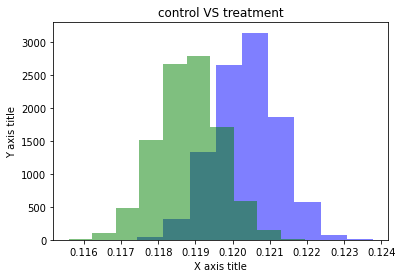

In [249]:
plt.hist(control_conv_prob, alpha=0.5, color='blue')
plt.hist(treatment_conv_prob, alpha=0.5, color='green');
plt.title("control VS treatment")
plt.xlabel('X axis title') 
plt.ylabel('Y axis title')

Text(0, 0.5, 'Y axis title')

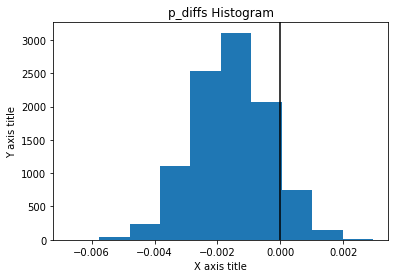

In [250]:
plt.hist(p_diffs);
plt.axvline(x=0, color='black');
plt.title("p_diffs Histogram")
plt.xlabel('X axis title') 
plt.ylabel('Y axis title')

In [251]:
import scipy.stats as stats

In [254]:
stats.percentileofscore(p_diffs, 0)

90.32

There is **90%** probability that the difference is less than 0 and therefore fitting the **$H_0$**

In [255]:
(p_diffs < 0).mean()

0.9032

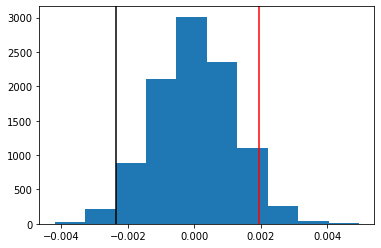

In [256]:
# alternatively, we can simulate the differences under the null, i.e. when the mean difference is 0
# now we can look at how likely it is we would observe our observed difference or a more extreme values in favour of H1, 
# given that the H0 is true, which in our case means difference values higher than the obs_diff
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='black');
plt.axvline(x=np.percentile(null_vals, 95), color='red');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [258]:
'''proportion of the p_diffs greater than the actual difference observed is 50%
 however, if binomial was used to bootstrap, 
 we would have the distribution under the null and then it would be 90%, our p-value '''
(p_diffs > obs_diff).mean()

0.7473

In [259]:
p_value = (null_vals > obs_diff).mean()
p_value

0.9755

In [260]:
p_value = 1 - stats.percentileofscore(null_vals, obs_diff) / 100
p_value

0.9755

In [262]:
np.percentile(null_vals, 95)

0.0019374767271254521

we would only be able to reject the null if the observed difference was higher than **0.002**


**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>We calculated the **p-value**. The p-value of **0.9** says that given that the null hypothesis is **true**, there is **90%** probability of observing our conversion difference (or one more extreme in favour of the alternative).
The null therefore cannot be rejected (with a type I **error rate of 5%** or any other reasonable type I error rate) and we should keep the old page.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [263]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('(converted == 1) and (group == "control")').count() 

# number of conversions with the new_page
convert_new = df2.query('(converted == 1) and (group == "treatment")').count()

# number of individuals who were shown the old_page
n_old = df2.query('group == "control"').count()

# number of individuals who received new_page
n_new = df2.query('group == "treatment"').count()

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

>**Tip**: You don't have to dive deeper into z-test for this exercise. **Try having an overview of what does z-score signify in general.** 

In [265]:
import statsmodels.api as sm
counts = [convert_new.iloc[0], convert_old.iloc[0]]
nobs = [n_new.iloc[0], n_old.iloc[0]]
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest(counts,nobs,alternative= 'larger')
print(z_score,'\n', p_value)

-1.3116075339133115 
 0.905173705140591


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

>With **significance level equal to 5%** and **p-value > significance level**, we could say that we couldn't reject the null hypothesis which means with significance level equal to **5%**, we couldn't find sufficient evidence to support that **new page has conversion rate greater than the old page**
And **YES** the **z-test result is similar to what we got using the bootstrapping approach**

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Logistic regression**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [266]:
df2['intercept'] = 1
df2['ab_page'] = df2.group.apply(lambda x:1 if x=="treatment" else 0)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [267]:
model = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [268]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:                94019
Model:                          Logit   Df Residuals:                    94017
Method:                           MLE   Df Model:                            1
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:               8.328e-06
Time:                        15:45:50   Log-Likelihood:                -34513.
converged:                       True   LL-Null:                       -34513.
Covariance Type:            nonrobust   LLR p-value:                    0.4483
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9841      0.014   -140.152      0.000      -2.012      -1.956
ab_page       -0.0152      0.020     -0.758      0.448      -0.055       0.024
==============================================================================
"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


>The **p-value** associated with **ab_page** equal to **0.190** and it differ because the hypothesis are different.
<br>The main null hypothesis of a multiple logistic regression is that there is no relationship between the X variables and the Y variable <br>
in other words: <br>
**$H_0$ : coefficient for each variable in X = 0** <br>
**$H_A$ : coefficient for each variable in X != 0** <br>
but in Part II the hypothesis was <br>
**$H_0$ : $p_{new}$ <= $p_{old}$** <br>
**$H_A$ : $p_{new}$ > $p_{old}$**

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>Adding new features or variables to the model is a **good** thing as long as it extends the model exploratory capabilities, metrics like Pseudo-R-squared and Log-Likelihood Ratio can help us in the diagnostics of a given logistic regression model

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [269]:
# Read the countries.csv
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [270]:
countries_df['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [273]:
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner' ,)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [274]:
# Create the necessary dummy variables
dum_countries = pd.get_dummies(countries['country'])
df4 = dum_countries.join(countries, how='inner')
df4.head()

,CA,UK,US,user_id,country
0,0,1,0,834778,UK
1,0,0,1,928468,US
2,0,1,0,822059,UK
3,0,1,0,711597,UK
4,0,1,0,710616,UK


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

>**Tip**: Conclusions should include both statistical reasoning, and practical reasoning for the situation. 

>**Hints**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [275]:
df_new[['CA', 'US', 'UK']] = pd.get_dummies(df_new['country'])

In [276]:
df_new['intercept'] = 1
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'CA']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:               2.324e-05
Time:                        15:50:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.414      0.000      -2.004      -1.954
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
UK            -0.0099      0.013     -0.744      0.457      -0.036       0.016
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
==============================================================================
"""

In [277]:
np.exp(results.params)

intercept    0.138154
ab_page      0.985160
UK           0.990160
CA           0.950621
dtype: float64

In [278]:
1/np.exp(results.params)

intercept    7.238286
ab_page      1.015064
UK           1.009938
CA           1.051944
dtype: float64

>This regression summary shows that the country of origin and the type of page based on their p-values do not provide a statistical basis to reject the null hypothesis, based on a Type I error rate of **5%**.<br> 
Even with all this statistical analysis, as noted earlier, the practical significance of all this analysis does not seem required given that a 15 percent difference in the conversion rates between the control and treatment group was noted from the dataset itself, which is so minute as to not have any practical effect on deciding to switch to the new page rather than stay with the old one.

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your notebook to make sure that it satisfies all the specifications mentioned in the rubric. You should also probably remove all of the "Hints" and "Tips" like this one so that the presentation is as polished as possible.


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [279]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

255